In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sample = pd.read_csv(r'C:\Users\Niti\NEXT HIKES\PROJECT 6\sample_submission.csv')
store = pd.read_csv(r'C:\Users\Niti\NEXT HIKES\PROJECT 6\store.csv')
train = pd.read_csv(r'C:\Users\Niti\NEXT HIKES\PROJECT 6\train.csv', low_memory=False)
test = pd.read_csv(r'C:\Users\Niti\NEXT HIKES\PROJECT 6\test.csv')

In [4]:
sample.head(2)

,Id,Sales
0,1,0
1,2,0


In [5]:
store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [6]:
store.shape

(1115, 10)

In [7]:
train.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1


In [8]:
train.shape

(1017209, 9)

In [9]:
test.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,17-09-2015,1.0,1,0,0
1,2,3,4,17-09-2015,1.0,1,0,0


In [10]:
test.shape

(41088, 8)

Merging Store data with Train and Test data

In [11]:
df_train = pd.merge(train, store, how= 'left', on= 'Store')
df_test = pd.merge(test, store, how= 'left', on= 'Store')

In [12]:
df_train.shape

(1017209, 18)

In [13]:
df_test.shape

(41088, 17)

In [14]:
df_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [15]:
df_test.isnull().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

<Axes: >

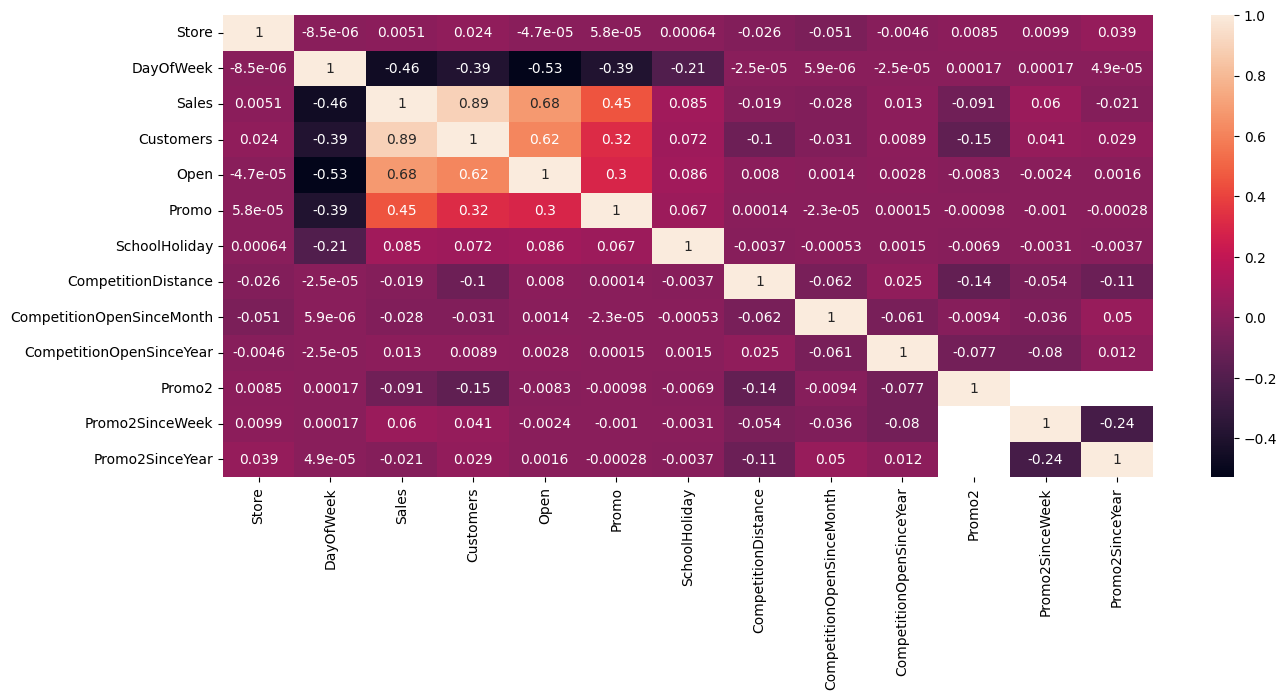

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(df_train.corr(numeric_only=True), annot=True)

Converting Tabular data to Time Series Data

In [17]:
import warnings
df_train["Date"]=pd.to_datetime(df_train["Date"])
df_train["Day"]=df_train["Date"].dt.day
df_train["Week"]=df_train["Date"].dt.isocalendar().week
df_train["Month"]=df_train["Date"].dt.month
df_train["Year"]=df_train["Date"].dt.year

C:\Users\Niti\AppData\Local\Temp\ipykernel_16348\2338652123.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_train["Date"]=pd.to_datetime(df_train["Date"])


In [18]:
df_test["Date"]=pd.to_datetime(df_test["Date"])
df_test["Day"]=df_test["Date"].dt.day
df_test["Week"]=df_test["Date"].dt.isocalendar().week
df_test["Month"]=df_test["Date"].dt.month
df_test["Year"]=df_test["Date"].dt.year

C:\Users\Niti\AppData\Local\Temp\ipykernel_16348\932944305.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_test["Date"]=pd.to_datetime(df_test["Date"])


Check Dates

In [19]:
print("Train")
train_min = df_train['Date'].min()
print(f"min {train_min}")

train_max = df_train['Date'].max()
print(f"max {train_max}")

print(f"delta: {train_max - train_min}")

print("\nTest")

test_min = df_test['Date'].min()
print(f"min {test_min}")

test_max = df_test['Date'].max()
print(f"max {test_max}")

print(f"delta: {test_max - test_min}")


Train
min 2013-01-01 00:00:00
max 2015-07-31 00:00:00
delta: 941 days 00:00:00

Test
min 2015-08-01 00:00:00
max 2015-09-17 00:00:00
delta: 47 days 00:00:00


In [20]:
# train days / test days
941/47

20.02127659574468

95% days are for training and 5% days are for testing

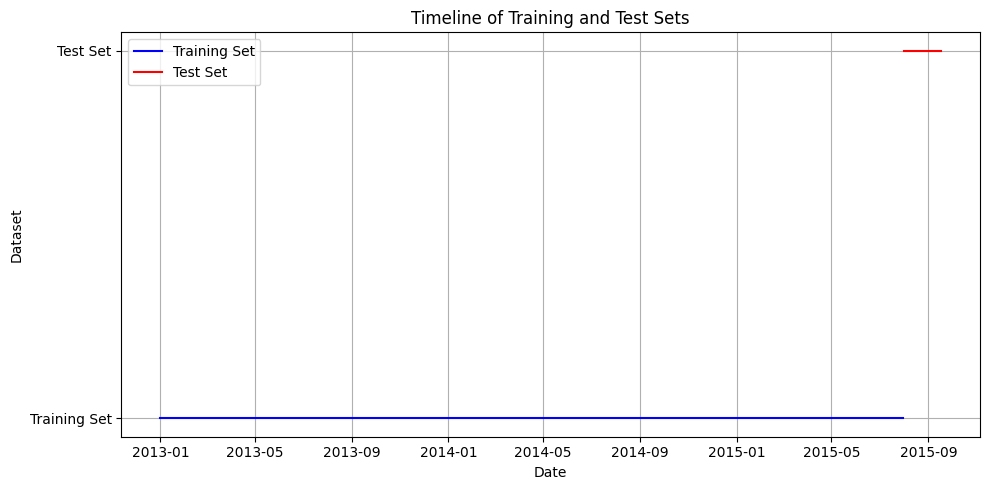

In [21]:
# Define the start and end dates for the training and test sets
train_start_date = train_min
train_end_date = train_max

test_start_date = test_min
test_end_date = test_max

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the training set duration
plt.plot([train_start_date, train_end_date], [1, 1], label='Training Set', color='blue')

# Plot the test set duration
plt.plot([test_start_date, test_end_date], [2, 2], label='Test Set', color='red')

# Set plot title and labels
plt.title('Timeline of Training and Test Sets')
plt.xlabel('Date')
plt.ylabel('Dataset')
plt.yticks([1, 2], ['Training Set', 'Test Set'])

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
df_train.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Week,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,31,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,31,7,2015


In [23]:
df_test.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Week,Month,Year
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,9.0,2008.0,0,NaN,NaN,NaN,17,38,9,2015
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",17,38,9,2015


In [24]:
df_train['Year'].value_counts()

Year
2013    406974
2014    373855
2015    236380
Name: count, dtype: int64

In [25]:
df_test['Year'].value_counts()

Year
2015    41088
Name: count, dtype: int64

Handling Missing Values

For 'CompetitionDistance' filling missing values with the Median distance

In [26]:
df_train['CompetitionDistance'].fillna(df_train['CompetitionDistance'].median(), inplace=True)
df_test['CompetitionDistance'].fillna(df_test['CompetitionDistance'].median(), inplace=True)

For 'CompetitionOpenSinceMonth' filling missing values with the most frequent value

In [27]:
df_train['CompetitionOpenSinceMonth'].fillna(df_train['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
df_test['CompetitionOpenSinceMonth'].fillna(df_test['CompetitionOpenSinceMonth'].mode()[0], inplace=True)

For 'CompetitionOpenSinceYear' filling missing values with the most frequent value

In [28]:
df_train['CompetitionOpenSinceYear'].fillna(df_train['CompetitionOpenSinceYear'].mode()[0], inplace=True)
df_test['CompetitionOpenSinceYear'].fillna(df_test['CompetitionOpenSinceYear'].mode()[0], inplace=True)

For 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval' filling missing values with 0

In [29]:
promo_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
df_train[promo_cols] = df_train[promo_cols].fillna(0)
df_test[promo_cols] = df_test[promo_cols].fillna(0)

For 'Open' column in test dataset, filling missing values with 1

In [30]:
df_test['Open'].fillna(1, inplace=True)

Checking if there are still missing values

In [31]:
df_train.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Day                          0
Week                         0
Month                        0
Year                         0
dtype: int64

In [32]:
df_test.isnull().sum()

Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Day                          0
Week                         0
Month                        0
Year                         0
dtype: int64

Outliers

In [34]:
Q1 = df_train['Sales'].quantile(0.25)
Q3 = df_train['Sales'].quantile(0.75)
IQR = Q3-Q1
outliers = df_train[(df_train['Sales'] < (Q1 - 1.5*IQR)) | (df_train['Sales'] > (Q3 + 1.5*IQR))]
outliers

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Week,Month,Year
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,4.0,2013.0,0,0.0,0.0,0,31,31,7,2015
23,24,5,2015-07-31,14190,1082,1,1,0,1,a,...,3.0,2000.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct",31,31,7,2015
24,25,5,2015-07-31,14180,1586,1,1,0,1,c,...,4.0,2003.0,0,0.0,0.0,0,31,31,7,2015
83,84,5,2015-07-31,14949,1439,1,1,0,1,a,...,8.0,2014.0,0,0.0,0.0,0,31,31,7,2015
107,108,5,2015-07-31,14927,992,1,1,0,0,d,...,9.0,2003.0,0,0.0,0.0,0,31,31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015767,788,3,2013-01-02,17934,1791,1,0,0,1,a,...,3.0,2013.0,0,0.0,0.0,0,2,1,1,2013
1015796,817,3,2013-01-02,25357,3462,1,0,0,1,a,...,3.0,2006.0,0,0.0,0.0,0,2,1,1,2013
1015821,842,3,2013-01-02,20355,1257,1,0,0,1,d,...,11.0,2007.0,0,0.0,0.0,0,2,1,1,2013
1016093,1114,3,2013-01-02,20642,3401,1,0,0,1,a,...,9.0,2013.0,0,0.0,0.0,0,2,1,1,2013


<Figure size 3000x600 with 0 Axes>

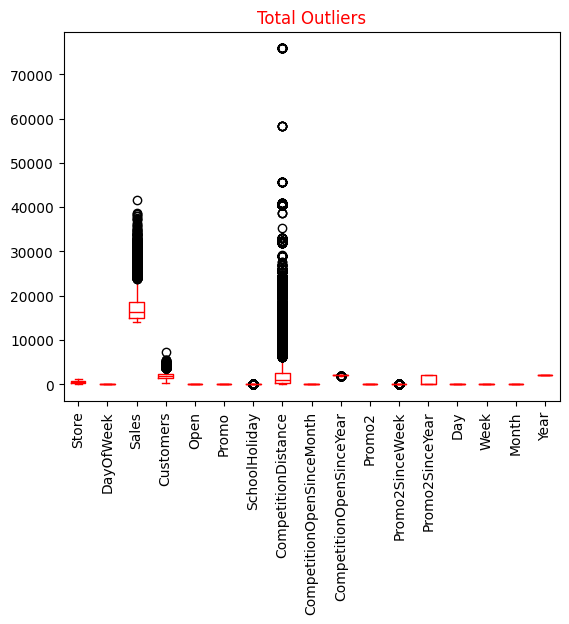

In [35]:
plt.figure(figsize = (15,3), dpi = 200)
outliers.plot(kind = 'box', color = 'red')
plt.xticks(rotation = 90)
plt.title('Total Outliers', color = 'red')
plt.show()

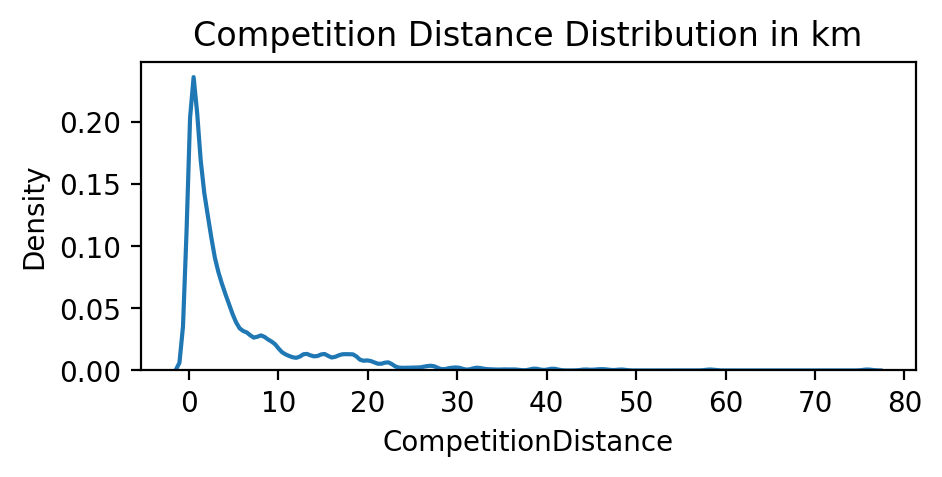

In [40]:
plt.figure(figsize=(5,2), dpi=200)
sns.kdeplot(df_train['CompetitionDistance']/1000)
plt.title('Competition Distance Distribution in km')
plt.show()


Most of the Competitor Stores are less than 5km away from the Store

In [41]:
print("Total number of stores: {}".format(len(df_train["Store"].unique())))
print("Average daily sales amount: {}".format(round(df_train["Sales"].mean(),2)))
print("Average daily sales per store: {}".format(round(df_train["Sales"].mean(),2)/len(df_train["Store"].unique())))

Total number of stores: 1115
Average daily sales amount: 5773.82
Average daily sales per store: 5.178313901345291


Task 1. Exploration of Customer Purchasing behaviour

●	Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [42]:
df_train['Promo2'].value_counts(normalize = True)

Promo2
1    0.500564
0    0.499436
Name: proportion, dtype: float64

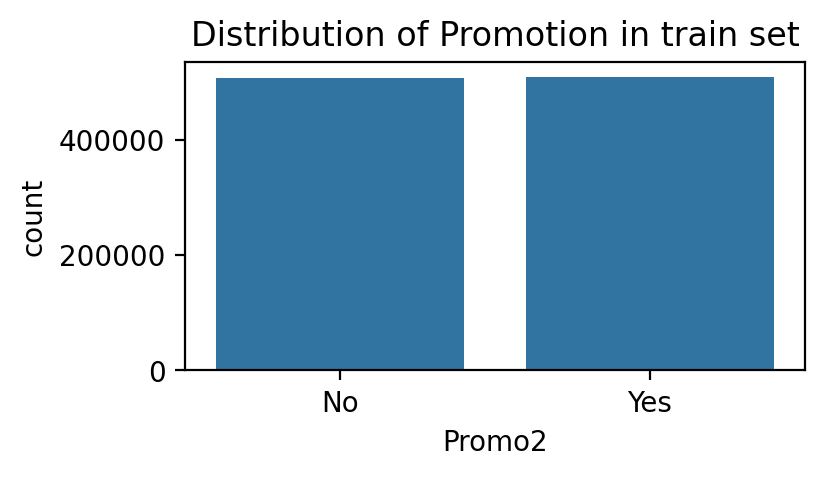

In [43]:
plt.figure(figsize=(4,2), dpi = 200)
sns.countplot(df_train, x = 'Promo2')
plt.title('Distribution of Promotion in train set')
plt.xticks([0,1], ['No','Yes'])
plt.show()

In [44]:
df_test['Promo2'].value_counts(normalize = True)

Promo2
1    0.580607
0    0.419393
Name: proportion, dtype: float64

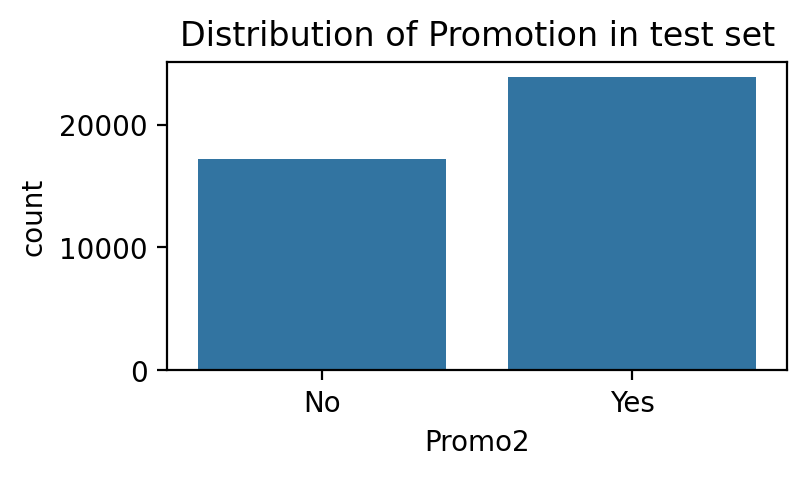

In [45]:
plt.figure(figsize=(4,2), dpi=200)
sns.countplot(df_test, x='Promo2')
plt.title('Distribution of Promotion in test set')
plt.xticks([0,1], ['No','Yes'])
plt.show()

Promotion in training and testing set is NOT similarly distributed

In [46]:
df_train['Promo'].value_counts(normalize = True)

Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64

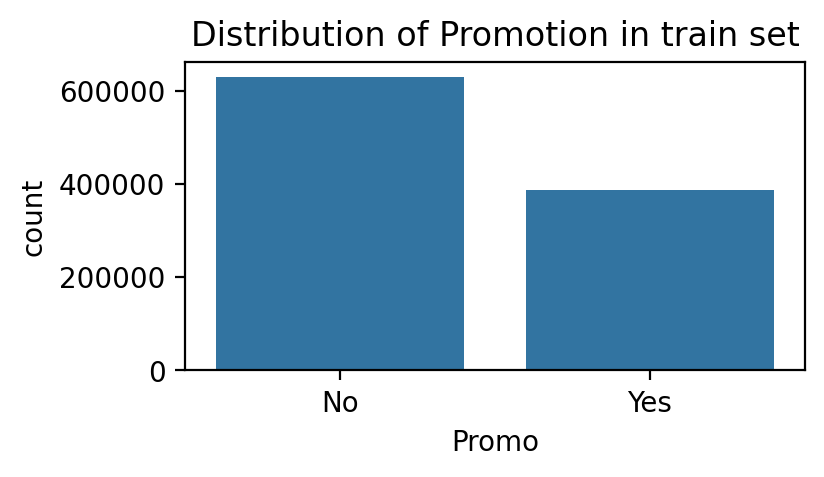

In [47]:
plt.figure(figsize=(4,2), dpi = 200)
sns.countplot(df_train, x = 'Promo')
plt.title('Distribution of Promotion in train set')
plt.xticks([0,1], ['No','Yes'])
plt.show()

In [48]:
df_test['Promo'].value_counts(normalize = True)

Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64

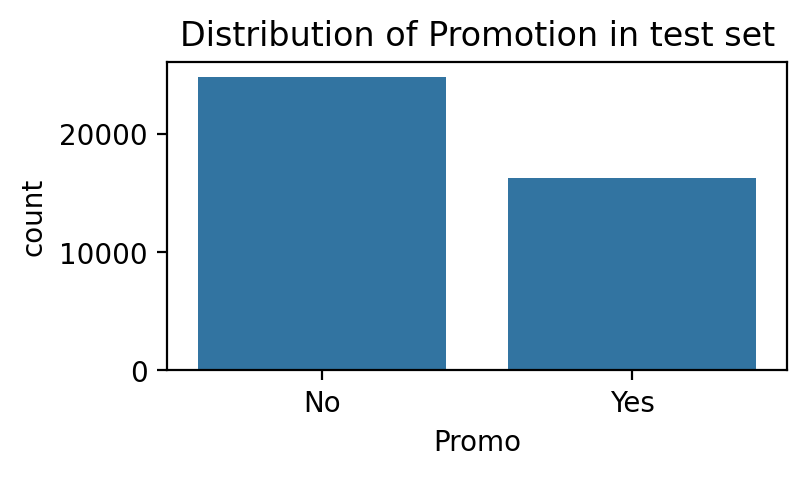

In [49]:
plt.figure(figsize=(4,2), dpi = 200)
sns.countplot(df_test, x = 'Promo')
plt.title('Distribution of Promotion in test set')
plt.xticks([0,1], ['No','Yes'])
plt.show()

Promotion in training and testing set is NOT similarly distributed

<Axes: title={'center': 'Promo vs.Customers'}, xlabel='Promo', ylabel='Customers'>

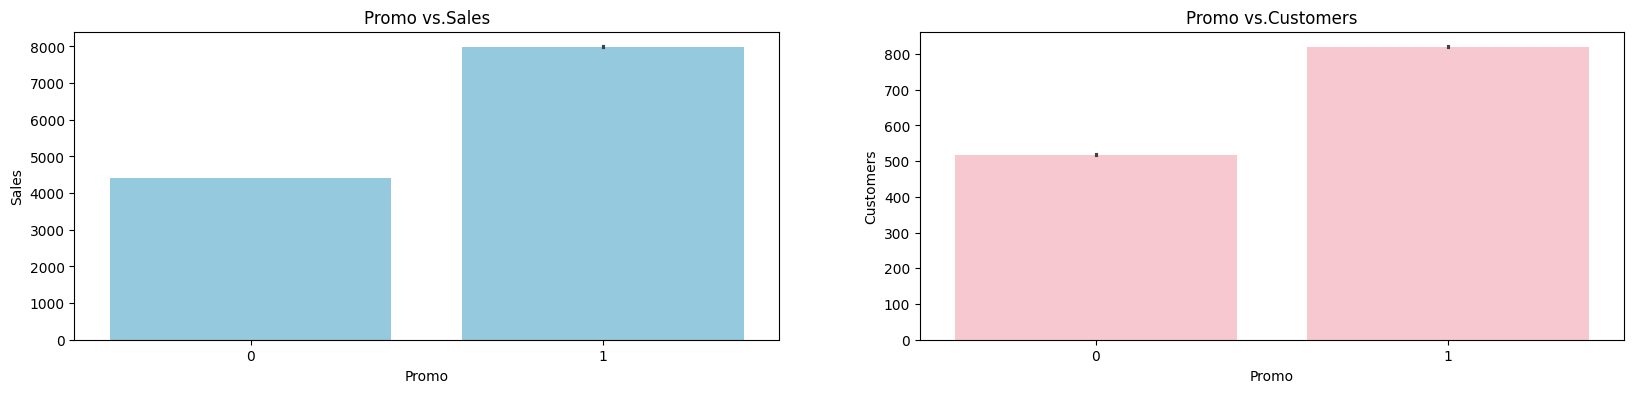

In [65]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,4))

axis1.title.set_text('Promo vs.Sales')
axis2.title.set_text('Promo vs.Customers')
sns.barplot(x='Promo', y='Sales', data=df_train, ax=axis1, color = 'Skyblue')
sns.barplot(x='Promo', y='Customers', data=df_train, ax=axis2, color = 'pink')

●	Check & compare sales behavior before, during and after holidays

Text(0.5, 1.0, 'Sales')

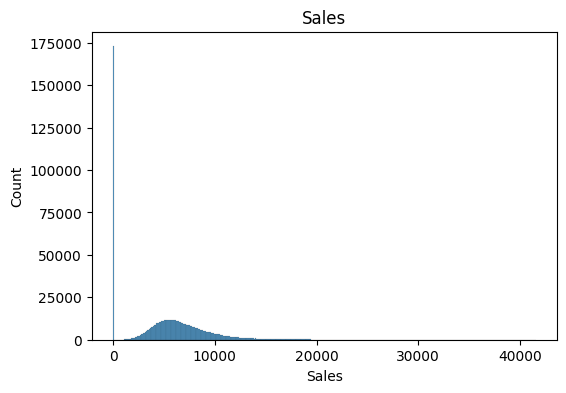

In [50]:
plt.figure(figsize=(6,4))
sns.histplot(df_train, x='Sales')
plt.title('Sales')

Most of the Sales are between 5000 and 10000 dollars

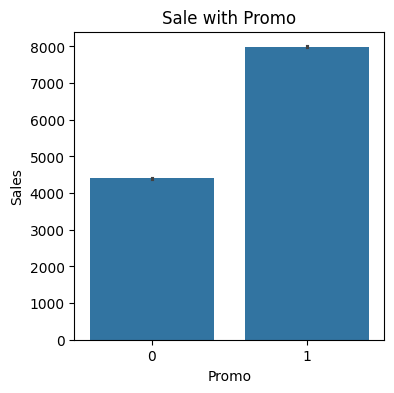

In [51]:
plt.figure(figsize=(4,4))
sns.barplot(df_train, x='Promo', y='Sales')
plt.title('Sale with Promo')
plt.show()

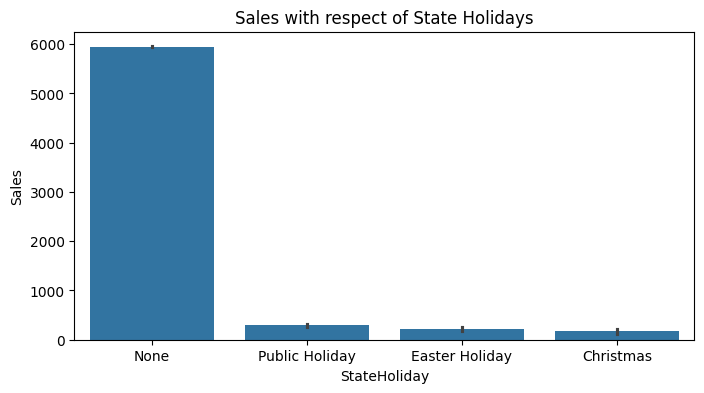

In [52]:
plt.figure(figsize=(8,4))
sns.barplot(df_train, x='StateHoliday', y='Sales')
plt.title('Sales with respect of State Holidays')
plt.xticks([0,1,2,3],['None','Public Holiday','Easter Holiday','Christmas'])
plt.show()

Text(0.5, 1.0, 'Special State Holidays Sales')

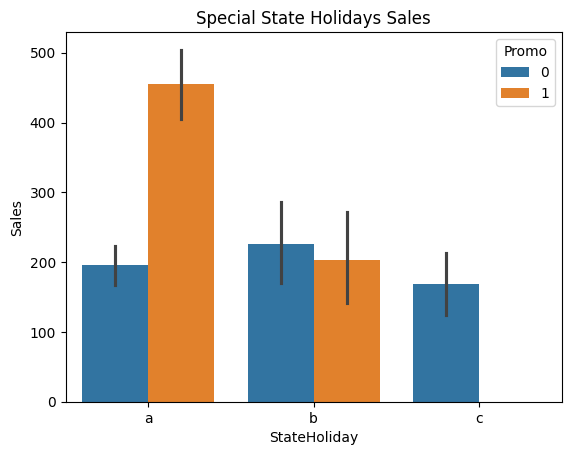

In [55]:
special_days_sales=df_train[df_train["StateHoliday"].isin(["a","b","c"])]
sns.barplot(x="StateHoliday",y="Sales",hue="Promo",data=special_days_sales)
plt.title('Special State Holidays Sales')

In [179]:
df_train['StateHoliday'].value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [180]:
df_train['SchoolHoliday'].value_counts()

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

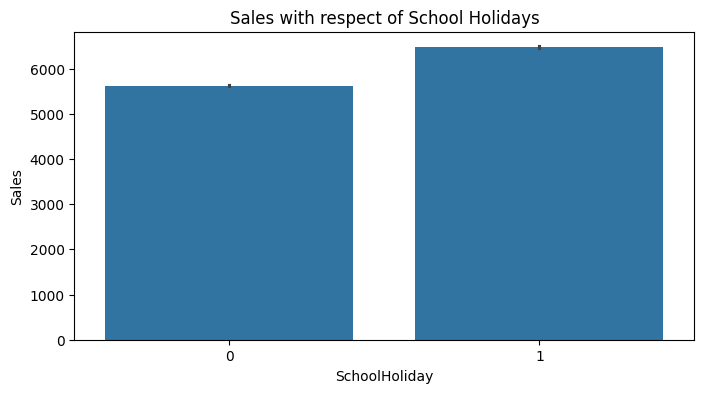

In [181]:
plt.figure(figsize=(8,4))
sns.barplot(df_train, x='SchoolHoliday', y='Sales')
plt.title('Sales with respect of School Holidays')
plt.show()

Sale do not vary much with School Holidays

Sale of each year in promotion breakdown

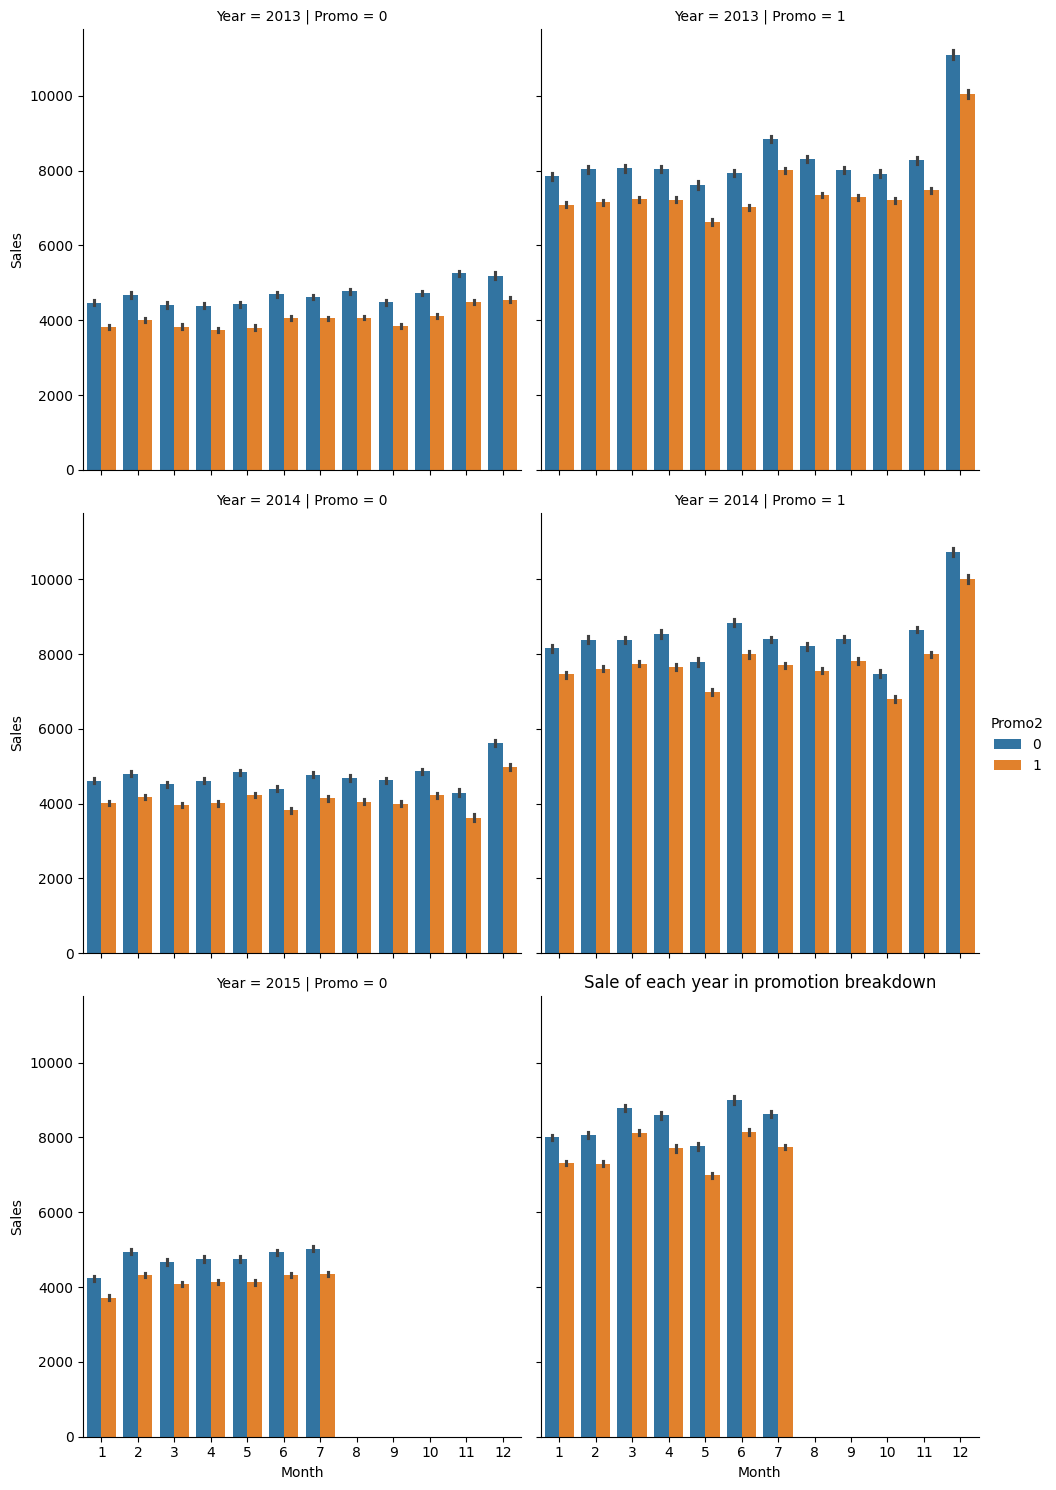

In [182]:
sns.catplot(data = df_train, x='Month', y='Sales', col ='Promo', hue='Promo2', row='Year', kind="bar")
plt.title('Sale of each year in promotion breakdown')
plt.show()

* We see that the campaigns carried out by the stores themselves and the campaigns jointly organized by the company have an increasing effect on sales.
* Strong sales are achieved when participating in the corporate campaign in the last month of the year.

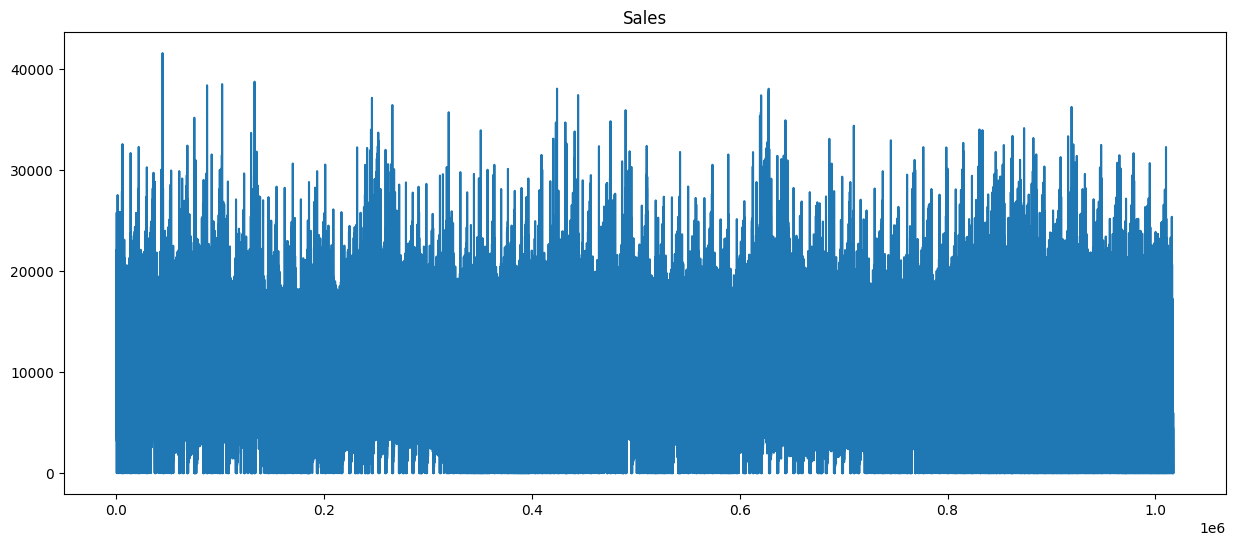

In [183]:
plt.figure(figsize=(15,6))
df_train['Sales'].plot()
plt.title('Sales')
plt.show()

Sales per Year

[]

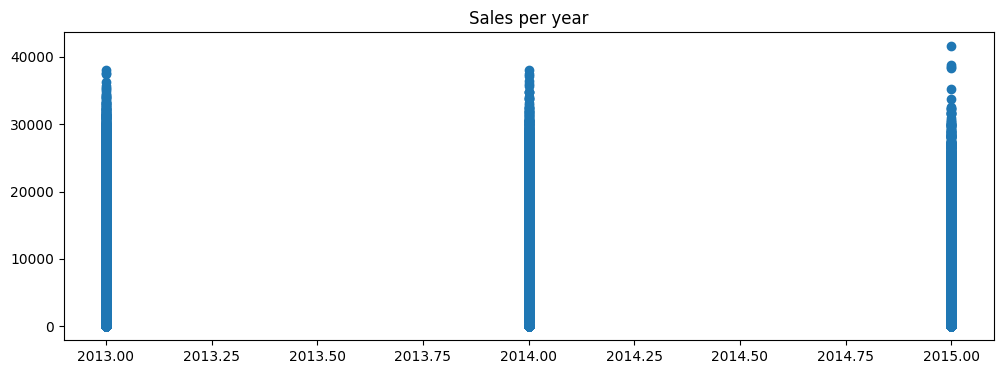

In [184]:
#Sales yearly
plt.figure(figsize=(12, 4))
plt.scatter(df_train["Year"],df_train["Sales"])
plt.title('Sales per year')
plt.plot()

Sales per Week

[]

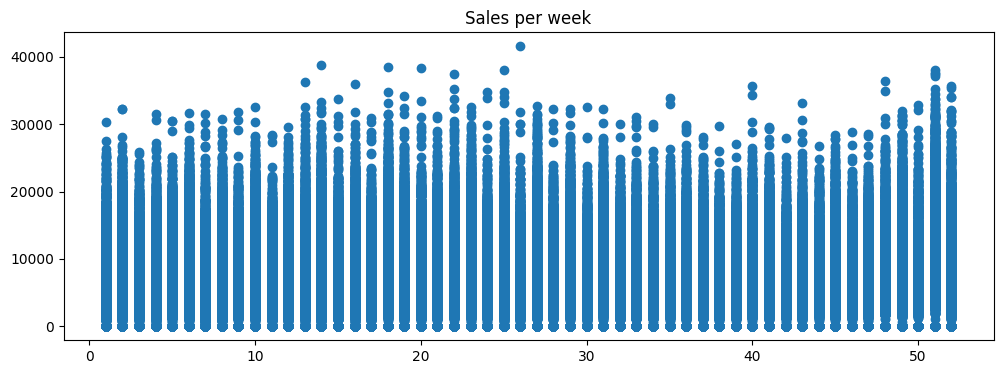

In [185]:
#Sales weekly
plt.figure(figsize=(12, 4))
plt.scatter(df_train["Week"],df_train["Sales"])
plt.title('Sales per week')
plt.plot()

[]

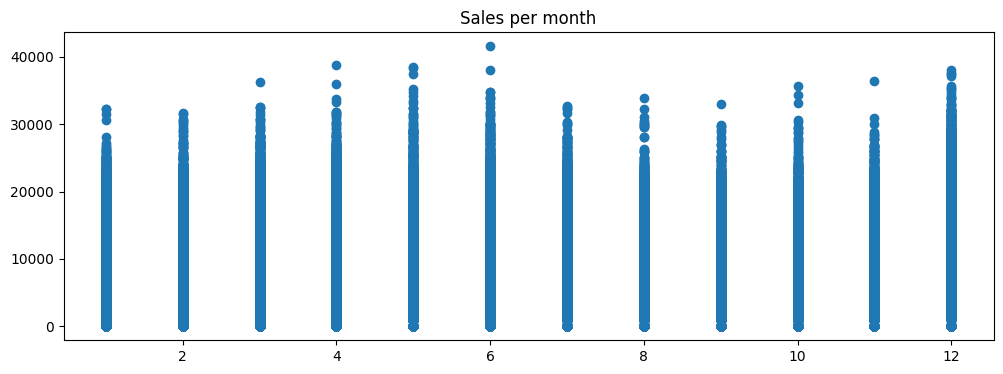

In [186]:
#Sales monthly
plt.figure(figsize=(12, 4))
plt.scatter(df_train["Month"],df_train["Sales"])
plt.title('Sales per month')
plt.plot()

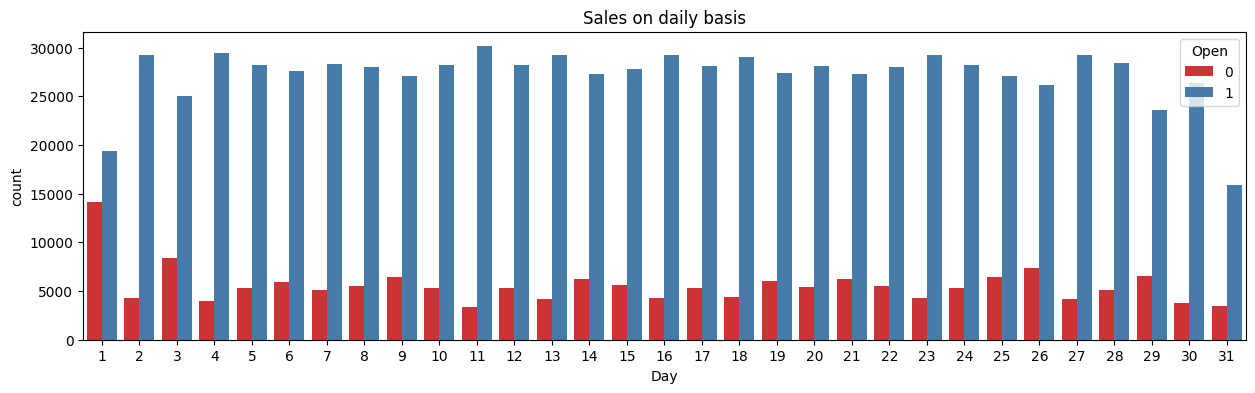

In [187]:
#Open_DayOfWeek
plt.figure(figsize=(15,4))
sns.countplot( x='Day', data=df_train, hue="Open", palette="Set1")
plt.title('Sales on daily basis')
plt.show()

Almost all the stores are closed at the weekend.

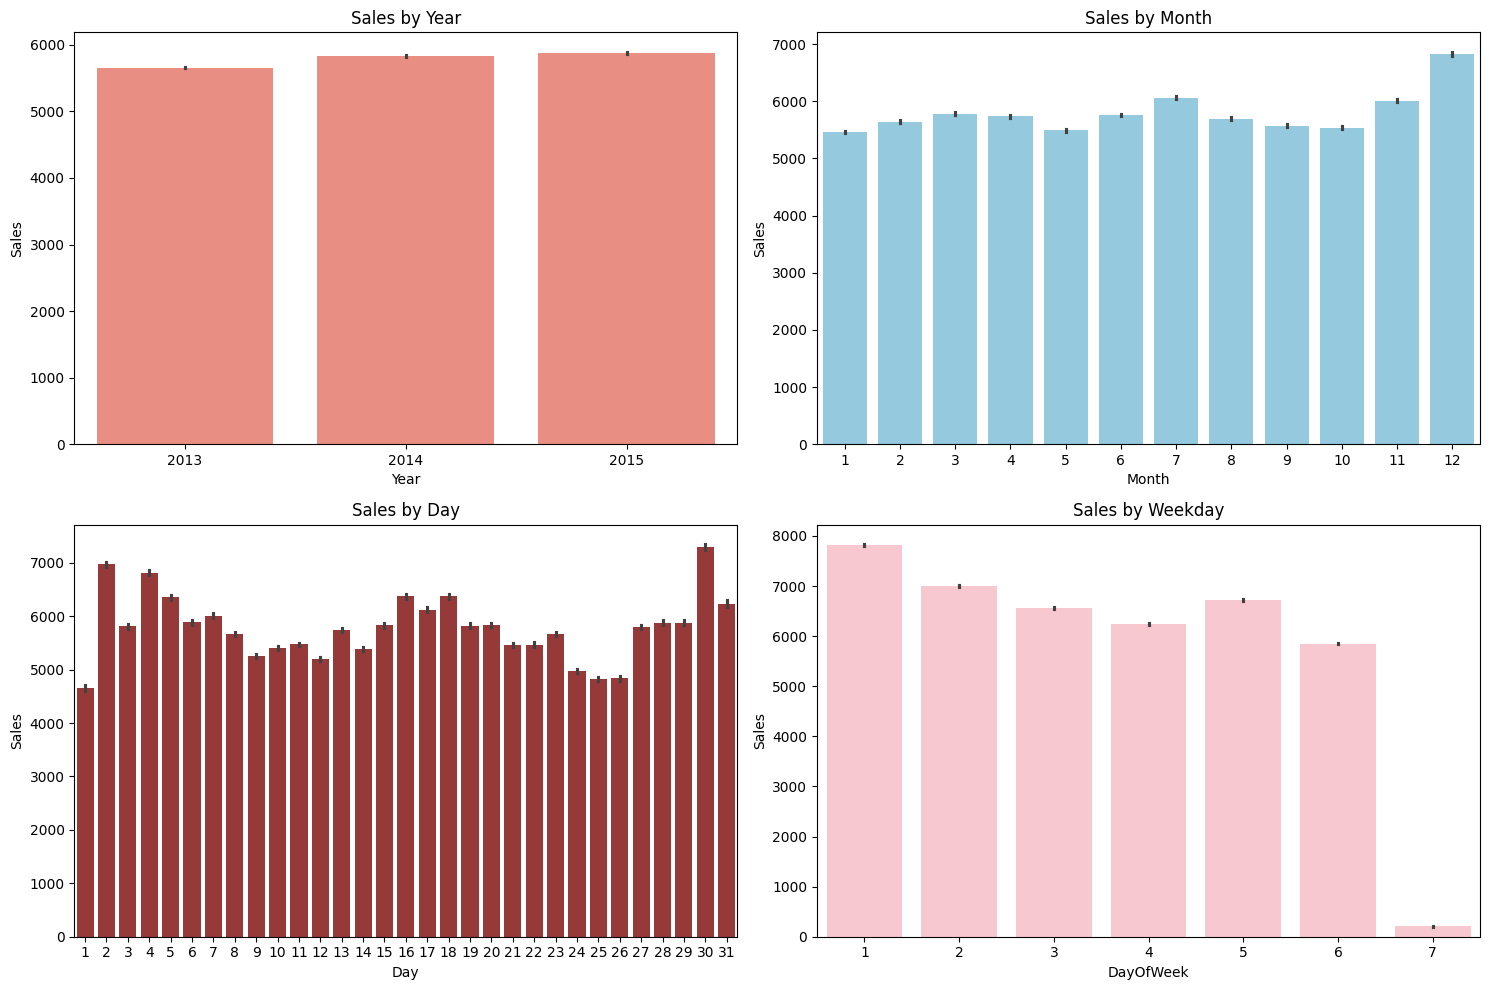

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(x='Year',y="Sales", data=df_train, ax=axes[0, 0], color = 'salmon')
sns.barplot(x='Month',y="Sales", data=df_train, ax=axes[0, 1], color = 'skyblue')
sns.barplot(x='Day',y="Sales", data=df_train, ax=axes[1, 0], color = 'brown')
sns.barplot(x='DayOfWeek',y="Sales", data=df_train, ax=axes[1, 1], color = 'pink')

# Set the titles for each chart
axes[0, 0].set_title('Sales by Year')
axes[0, 1].set_title('Sales by Month')
axes[1, 0].set_title('Sales by Day')
axes[1, 1].set_title('Sales by Weekday')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of bar charts
plt.show()

Text(0.5, 1.0, 'Sale on weekdays and weekend')

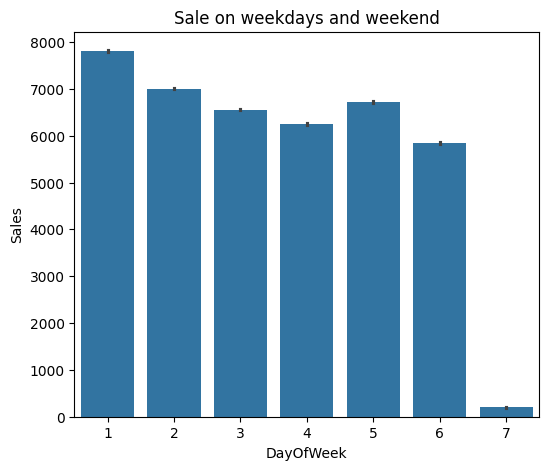

In [71]:
plt.figure(figsize=(6,5))
sns.barplot(df_train, x='DayOfWeek', y='Sales')
plt.title('Sale on weekdays and weekend')

Sales are the highest on Mondays (interesting) and on Sundays (ofcourse).

Weekdays Effect

Text(0.5, 1.0, 'Weekdays Effect')

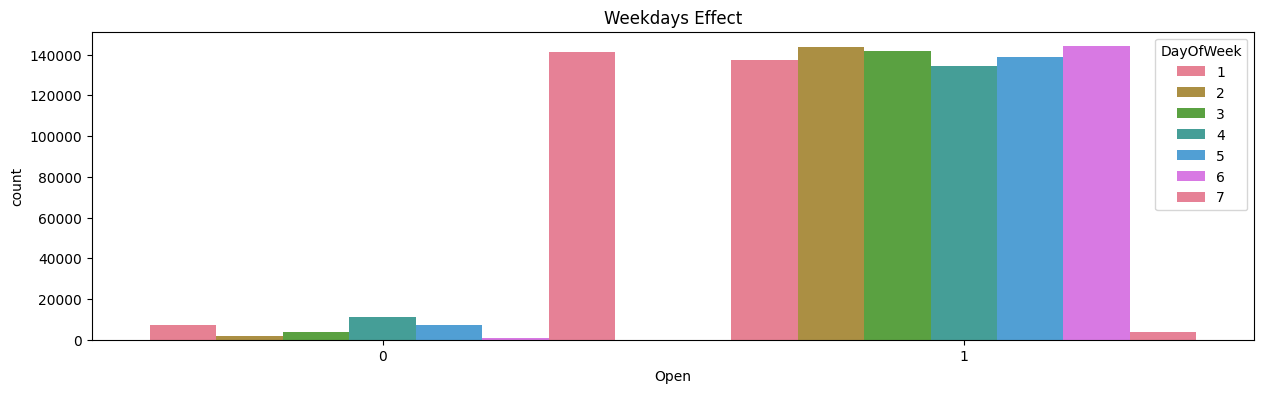

In [72]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=df_train,palette="husl", ax=axis1)
plt.title('Weekdays Effect')

Text(0.5, 1.0, 'Sales and Customers with respect of days of week')

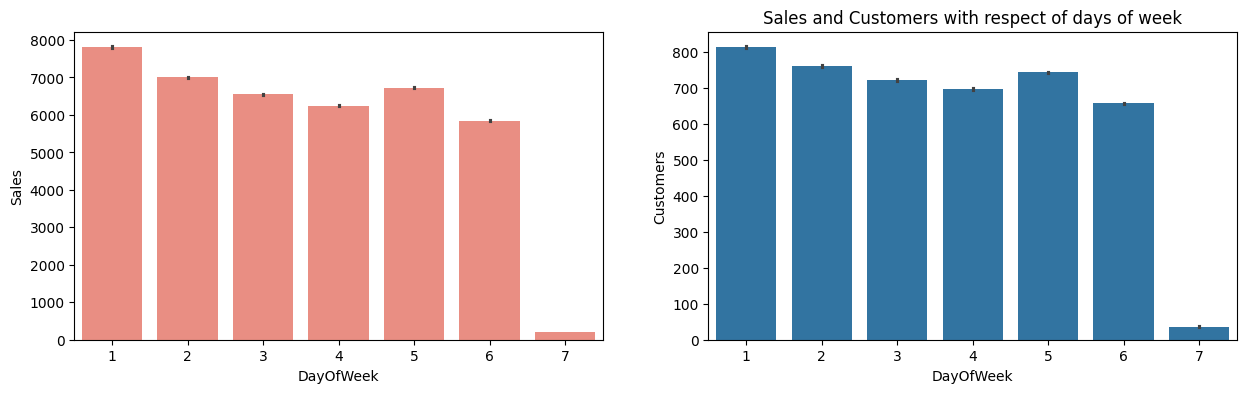

In [73]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=df_train, order=[1,2,3,4,5,6,7], ax=axis1, color = 'salmon')
sns.barplot(x='DayOfWeek', y='Customers', data=df_train, order=[1,2,3,4,5,6,7], ax=axis2)
plt.title('Sales and Customers with respect of days of week')

This clearly shows most sales are done with the first days, but very less on the last day due to the closed shops on sunday

In [74]:
average_sales_before_holiday = df_train[df_train['StateHoliday'] == 'a']['Sales'].mean()
average_sales_before_holiday

290.7356860809477

In [75]:
average_sales_during_holiday = df_train[df_train['StateHoliday'] == '0']['Sales'].mean()
average_sales_during_holiday

5947.48389255688

In [76]:
sales_before_holiday = df_train[df_train['SchoolHoliday'] == 1]['Sales'].mean()
sales_before_holiday

6476.522207119706

In [77]:
sales_during_holiday = df_train[df_train['SchoolHoliday'] == 0]['Sales'].mean()
sales_during_holiday

5620.97903381018

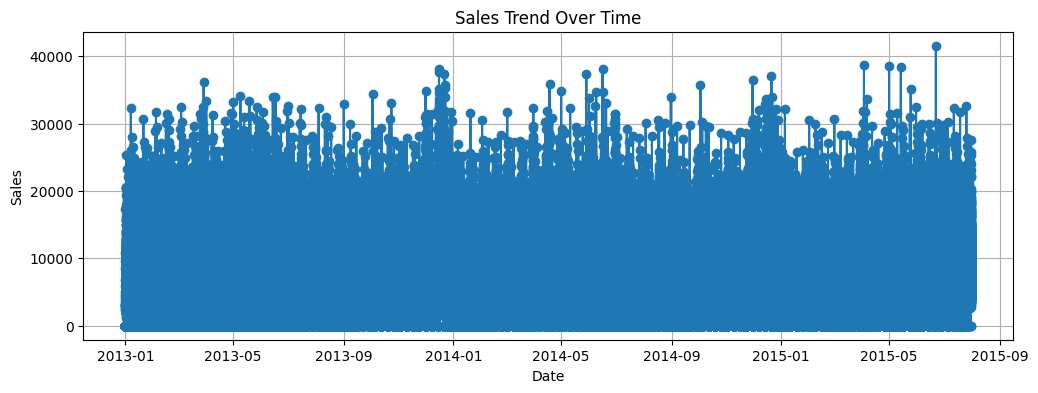

In [78]:
plt.figure(figsize=(12, 4))
plt.plot(df_train['Date'], df_train['Sales'], marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [79]:
df_train['StateHoliday'].value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [80]:
df_train['SchoolHoliday'].value_counts()

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

●	Find out any seasonal (Christmas, Easter etc) purchase behaviours

In [81]:
average_sales_christmas = df_train[df_train['StateHoliday'] == 'c']['Sales'].mean()
average_sales_christmas

168.7331707317073

In [82]:
average_sales_easter = df_train[df_train['StateHoliday'] == 'b']['Sales'].mean()
average_sales_easter

214.31150971599402

In [83]:
average_purchase_christmas = df_train[df_train['StateHoliday'] == 'c']['Customers'].mean()
average_purchase_christmas

27.17439024390244

In [84]:
average_purchase_easter = df_train[df_train['StateHoliday'] == 'b']['Customers'].mean()
average_purchase_easter

36.56188340807175

In [85]:
christmas_sale_by_date = df_train[df_train['StateHoliday'] == 'c'].groupby('Date')['Sales'].sum()
christmas_sale_by_date

Date
2013-12-25    142585
2013-12-26    188597
2014-12-25    155386
2014-12-26    205238
Name: Sales, dtype: int64

In [86]:
easter_sale_by_date = df_train[df_train['StateHoliday'] == 'b'].groupby('Date')['Sales'].sum()
easter_sale_by_date

Date
2013-03-29    213921
2013-04-01    241076
2014-04-18    222365
2014-04-21    240988
2015-04-03    242473
2015-04-06    272921
Name: Sales, dtype: int64

In [87]:
public_sale_by_date = df_train[df_train['StateHoliday'] == 'a'].groupby('Date')['Sales'].sum()
public_sale_by_date

Date
2013-01-01     97235
2013-01-06      9954
2013-05-01    200972
2013-05-09    233215
2013-05-20    253936
2013-05-30    685181
2013-08-15    194064
2013-10-03    285518
2013-10-31     12318
2013-11-01     80015
2013-11-20         0
2014-01-01    118108
2014-01-06     25266
2014-05-01    238077
2014-05-29    292254
2014-06-09    288181
2014-06-19    701292
2014-10-03    307988
2014-10-31     19158
2014-11-01     94292
2014-11-19         0
2015-01-01    130162
2015-01-06     23818
2015-05-01    264231
2015-05-14    289247
2015-05-25    299473
2015-06-04    746350
Name: Sales, dtype: int64

In [88]:
no_sale_by_date = df_train[df_train['StateHoliday'] == '0'].groupby('Date')['Sales'].sum()
no_sale_by_date

Date
2013-01-02     6949829
2013-01-03     6347820
2013-01-04     6638954
2013-01-05     5951593
2013-01-06      133950
                ...   
2015-07-27    10707292
2015-07-28     9115073
2015-07-29     8499962
2015-07-30     8798854
2015-07-31    10109742
Name: Sales, Length: 919, dtype: int64

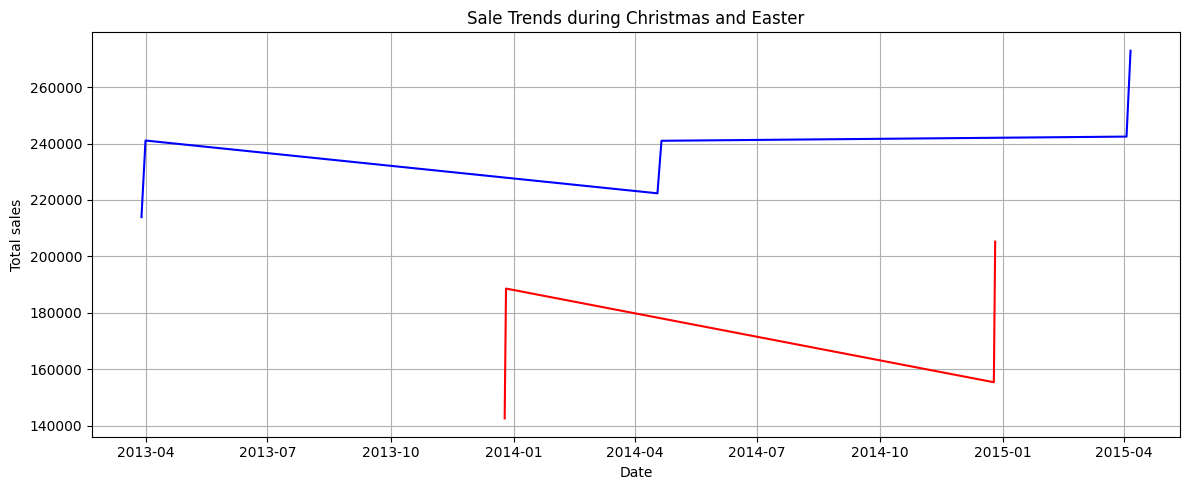

In [89]:
plt.figure(figsize=(12,5))
plt.plot(christmas_sale_by_date.index, christmas_sale_by_date.values, label= 'Christmas (c)', color = 'red')
plt.plot(easter_sale_by_date.index, easter_sale_by_date.values, label= 'Easter (b)', color = 'blue')
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.title('Sale Trends during Christmas and Easter')
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
# average number of customers per day during christmas
avg_customer_christmas = df_train[df_train['StateHoliday'] == 'c'].groupby('Date')['Customers'].mean().mean()
avg_customer_christmas

27.425386681374547

In [91]:
# average number of customers per day during easter
avg_customer_easter = df_train[df_train['StateHoliday'] == 'b'].groupby('Date')['Customers'].mean().mean()
avg_customer_easter

36.56188340807175

In [92]:
# average sales per customer during christmas
avg_sales_per_customer_christmas = df_train[df_train['StateHoliday'] == 'c']['Sales'].sum() / df_train[df_train['StateHoliday']=='c']['Customers'].sum()

In [93]:
# average sales per customer during easter
avg_sales_per_customer_easter = df_train[df_train['StateHoliday'] == 'b']['Sales'].sum() / df_train[df_train['StateHoliday']=='b']['Customers'].sum()

In [94]:
categories = ['Christmas (c)', 'Easter (b)']
avg_customers = [avg_customer_christmas, avg_customer_easter]
avg_sales_per_customer = [avg_sales_per_customer_christmas, avg_sales_per_customer_easter]

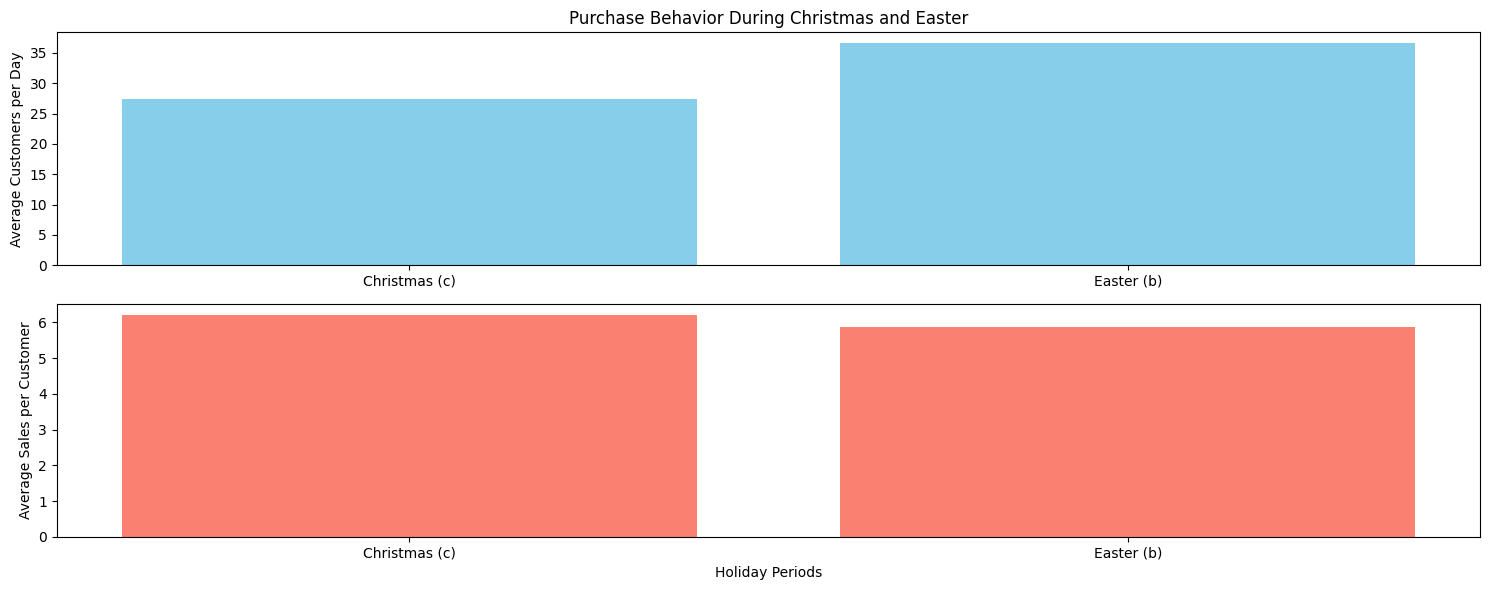

In [95]:
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
plt.bar(categories, avg_customers, color = 'skyblue')
plt.ylabel('Average Customers per Day')
plt.title('Purchase Behavior During Christmas and Easter')


plt.subplot(2, 1, 2)
plt.bar(categories, avg_sales_per_customer, color='salmon')
plt.ylabel('Average Sales per Customer')
plt.xlabel('Holiday Periods')

plt.tight_layout()
plt.show()


●	What can you say about the correlation between sales and number of customers?

In [96]:
correlation = df_train['Sales'].corr(df_train['Customers'])
print(f"The correlation between sales and number of customers is {correlation}")

The correlation between sales and number of customers is 0.8947107733016973


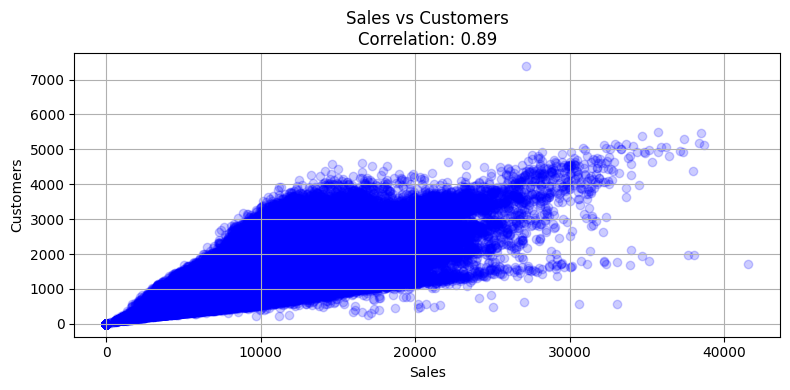

In [97]:
plt.figure(figsize=(8, 4))
plt.scatter(df_train['Sales'], df_train['Customers'], color='blue', alpha=0.2)
plt.title(f'Sales vs Customers\nCorrelation: {correlation:.2f}')
plt.xlabel('Sales')
plt.ylabel('Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

A nice level of correlation

●	How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [98]:
avg_sales_with_promo = df_train[df_train['Promo'] == 1]['Sales'].mean()
avg_sales_without_promo = df_train[df_train['Promo'] == 0]['Sales'].mean()
print("Average Sales with Promotion:", avg_sales_with_promo)
print("Average Sales without Promotion:", avg_sales_without_promo)



Average Sales with Promotion: 7991.152045969903
Average Sales without Promotion: 4406.050805160786


In [99]:
avg_customers_with_promo = df_train[df_train['Promo'] == 1]['Customers'].mean()
avg_customers_without_promo = df_train[df_train['Promo'] == 0]['Customers'].mean()
print("Average Customers with Promotion:", avg_customers_with_promo)
print("Average Customers without Promotion:", avg_customers_without_promo)


Average Customers with Promotion: 820.0988146773861
Average Customers without Promotion: 517.8235417537579


In [100]:
avg_sales_per_customer_with_promo = avg_sales_with_promo / avg_customers_with_promo
avg_sales_per_customer_without_promo = avg_sales_without_promo / avg_customers_without_promo
print("Average Sales per Customer with Promotion:", avg_sales_per_customer_with_promo)
print("Average Sales per Customer without Promotion:", avg_sales_per_customer_without_promo)

Average Sales per Customer with Promotion: 9.744133149507716
Average Sales per Customer without Promotion: 8.50878812932767


In [101]:
# Create lists for bar plot
categories = ['With Promotion', 'Without Promotion']
avg_sales_per_customer = [avg_sales_per_customer_with_promo, avg_sales_per_customer_without_promo]


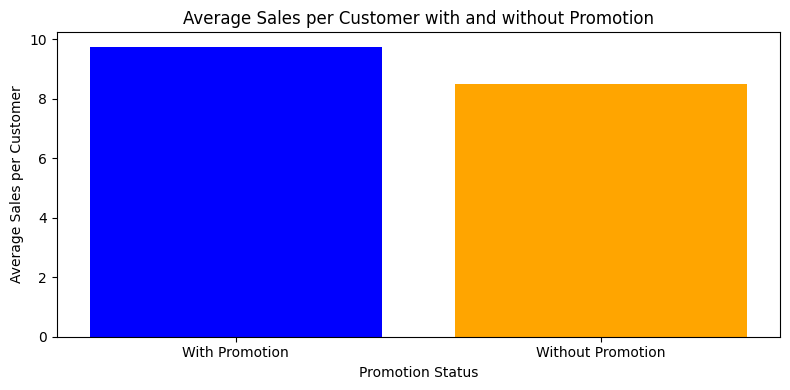

In [102]:
plt.figure(figsize=(8,4))
plt.bar(categories, avg_sales_per_customer, color=['blue', 'orange'])

# Add titles and labels
plt.title('Average Sales per Customer with and without Promotion')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales per Customer')

# Show the plot
plt.tight_layout()
plt.show()

Using promos increases average number of customers

●	Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

In [103]:
grouped_data = df_train.groupby(['Store', 'Promo2'])
average_sales_by_group = grouped_data['Sales'].mean().reset_index()
average_customers_by_group = grouped_data['Customers'].mean().reset_index()

In [104]:
#print("Average Sales by StoreType and Promo2 participation:")
#print(average_sales_by_group)
#print("\nAverage Customers by StoreType and Promo2 participation:")
#print(average_customers_by_group)

In [105]:
result= pd.merge(average_sales_by_group, average_customers_by_group, on = ['Store', 'Promo2'])
result

,Store,Promo2,Sales,Customers
0,1,0,3945.704883,467.646497
1,2,1,4122.991507,486.045648
2,3,1,5741.253715,620.286624
3,4,0,8021.769639,1100.057325
4,5,0,3867.110403,444.360934
...,...,...,...,...
1110,1111,1,4342.968153,373.548832
1111,1112,0,8465.280255,693.498938
1112,1113,0,5516.180467,596.763270
1113,1114,0,17200.196391,2664.057325


These are the stores where promos should deployed in

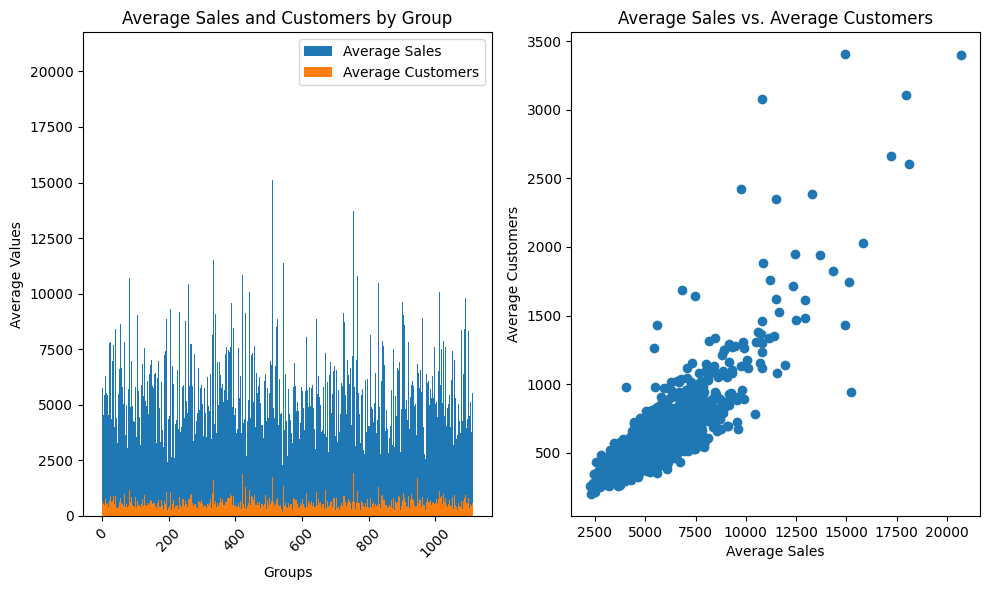

In [106]:
plt.figure(figsize=(10, 6))

# Bar plot
plt.subplot(1, 2, 1)
plt.bar(result.index, result['Sales'], label='Average Sales')
plt.bar(result.index, result['Customers'], label='Average Customers')
plt.xlabel('Groups')
plt.ylabel('Average Values')
plt.title('Average Sales and Customers by Group')
plt.xticks(rotation=45)
plt.legend()

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(result['Sales'], result['Customers'])
plt.xlabel('Average Sales')
plt.ylabel('Average Customers')
plt.title('Average Sales vs. Average Customers')

plt.tight_layout()
plt.show()

●	Trends of customer behavior during store open and closing times

In [107]:
# group data by open / close status of the store
grouped = df_train.groupby('Open')
# average number of customers for each open/close status
avg_customers_by_status = grouped['Customers'].mean()

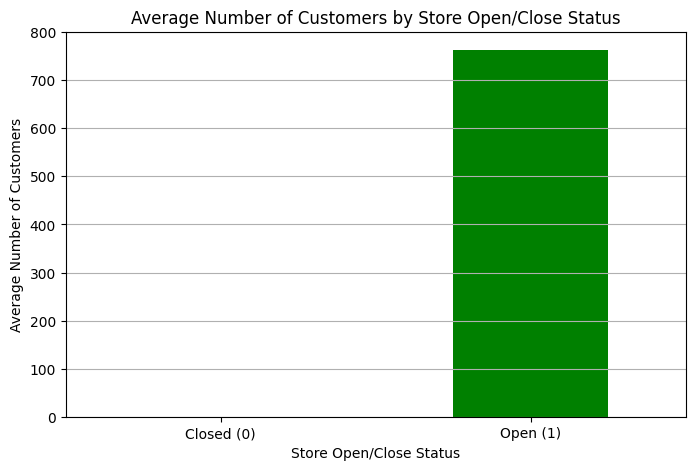

In [108]:
plt.figure(figsize=(8, 5))
avg_customers_by_status.plot(kind='bar', color=['red', 'green'])
plt.title('Average Number of Customers by Store Open/Close Status')
plt.xlabel('Store Open/Close Status')
plt.ylabel('Average Number of Customers')
plt.xticks([0, 1], ['Closed (0)', 'Open (1)'], rotation=0)
plt.grid(axis='y')
plt.show()

100% results

●	Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [109]:
# group data by store and calculate total number of weekdays each store is open
#open_weekdays = df_train[df_train['Open']==1].groupby('Store')['DayOfWeek'].nunique()

In [110]:
# identify stores opened on all days
#stores_open_all_weekdays = open_weekdays[open_weekdays == 5].index.tolist()

In [111]:
# filter data for stores open on all weekdays
#stores_open_all_weekdays_data = df_train[df_train['Store'].isin(stores_open_all_weekdays)]

In [112]:
# calculate average sales on weekdays and on weekends
#avg_sales_weekdays = stores_open_all_weekdays_data[stores_open_all_weekdays_data['DayOfWeek'] < 6]['Sales']
#avg_sales_weekends = stores_open_all_weekdays_data[stores_open_all_weekdays_data['DayOfWeek'] >= 6]['Sales']
# calculate mean
#avg_sales_weekdays = avg_sales_weekdays.mean()
#avg_sales_weekends = avg_sales_weekends.mean()

In [113]:
# display result
#print("Average sales on weekdays for stores opened on all weekdays:", avg_sales_weekdays)
#print("Average sales on weekends for stores opened on all weekdays:", avg_sales_weekends)

In [114]:
#df_train['DayOfWeek'].value_counts()

In [115]:
# Group data by Store and DayOfWeek, count the number of records for each store and each day
store_day_counts = df_train.groupby(['Store', 'DayOfWeek']).size().unstack()

In [116]:
# Check if stores are open on all weekdays (Monday to Friday)
stores_open_all_weekdays = store_day_counts[(store_day_counts[[1, 2, 3, 4, 5]] > 0).all(axis=1)].index.tolist()

In [117]:
# Print the stores opened on all weekdays
print("Stores opened on all weekdays (Monday to Friday):", stores_open_all_weekdays)

Stores opened on all weekdays (Monday to Friday): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 21

In [118]:
# Filter data for stores opened on all weekdays
stores_open_all_weekdays_data = df_train[df_train['Store'].isin(stores_open_all_weekdays)]

In [119]:
# Calculate average sales for weekdays and weekends
average_sales_weekdays = stores_open_all_weekdays_data[stores_open_all_weekdays_data['DayOfWeek'].isin([1, 2, 3, 4, 5])]['Sales'].mean()
average_sales_weekends = stores_open_all_weekdays_data[stores_open_all_weekdays_data['DayOfWeek'].isin([6, 7])]['Sales'].mean()

In [120]:
# Print the results
print("Average sales on weekdays for stores opened on all weekdays:", average_sales_weekdays)
print("Average sales on weekends for stores opened on all weekdays:", average_sales_weekends)

Average sales on weekdays for stores opened on all weekdays: 6866.806350816009
Average sales on weekends for stores opened on all weekdays: 3025.872894355006


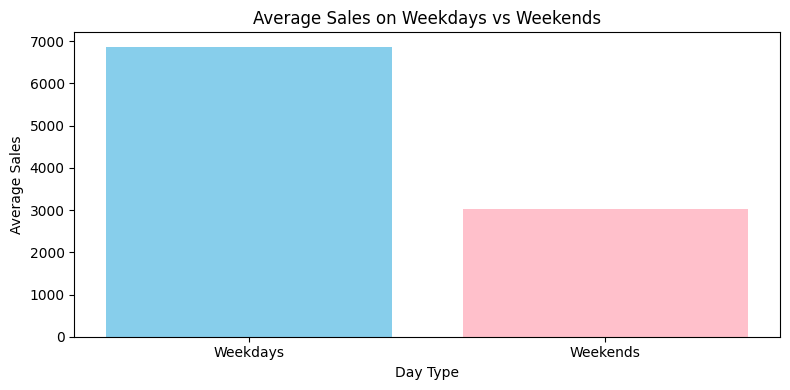

In [121]:
# Create lists for bar plot
categories = ['Weekdays', 'Weekends']
average_sales = [average_sales_weekdays, average_sales_weekends]

# Create the bar plot
plt.figure(figsize=(8, 4))
plt.bar(categories, average_sales, color=['skyblue', 'pink'])

# Add titles and labels
plt.title('Average Sales on Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Average Sales')

# Show the plot
plt.tight_layout()
plt.show()

●	Check how the assortment type affects sales

In [122]:
# Group data by Assortment Type and calculate average sales
average_sales_by_assortment = df_train.groupby('Assortment')['Sales'].mean()

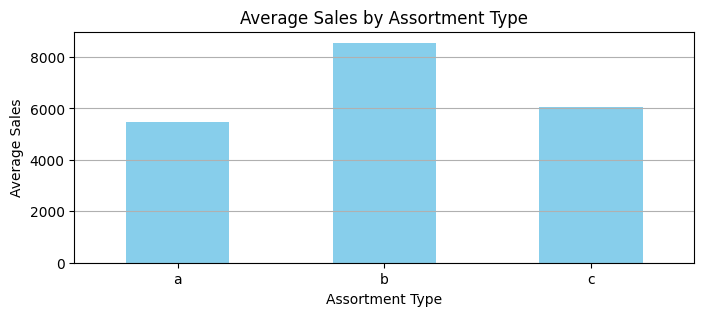

In [123]:
# Plot the results
plt.figure(figsize=(8, 3))
average_sales_by_assortment.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

●	How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

In [124]:
df_train['Distance_to_Competitor'] = df_train['CompetitionDistance']

In [125]:
# Analyze the relationship between sales and the distance to the nearest competitor
sales_vs_distance_corr = df_train['Sales'].corr(df_train['Distance_to_Competitor'])
print("Correlation between Sales and Distance to Competitor:", sales_vs_distance_corr)
print("There is a negative correlation between sales and distance to competitors.")
print("As the distance to competitors increases, sales tend to decrease.")

Correlation between Sales and Distance to Competitor: -0.01886982841915687
There is a negative correlation between sales and distance to competitors.
As the distance to competitors increases, sales tend to decrease.


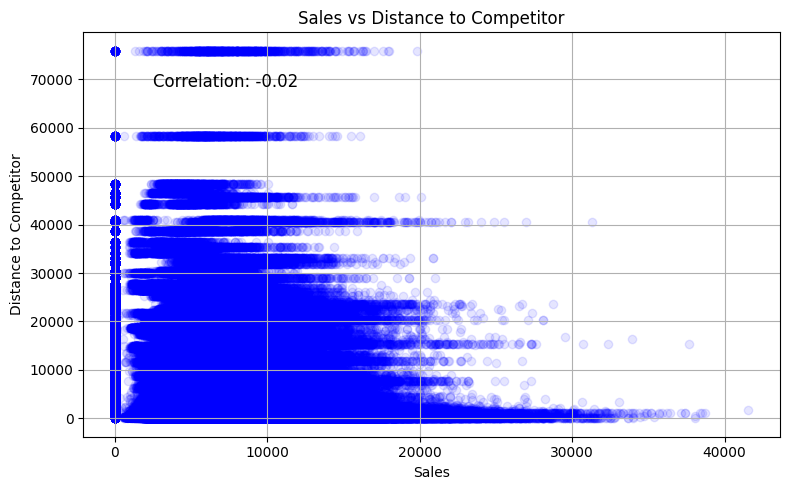

In [126]:
# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df_train['Sales'], df_train['Distance_to_Competitor'], color='blue', alpha=0.1)

# Add a title and labels
plt.title('Sales vs Distance to Competitor')
plt.xlabel('Sales')
plt.ylabel('Distance to Competitor')

# Add correlation information to the plot
plt.text(0.1, 0.9, f'Correlation: {sales_vs_distance_corr:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

●	How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

In [127]:
# Identify stores with missing competitor distance initially
stores_missing_distance = df_train[df_train['CompetitionDistance'].isna()]
stores_missing_distance

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Week,Month,Year,Distance_to_Competitor


In [128]:
# Track changes in competitor distance for stores with missing values
stores_missing_distance_updated = df_train[df_train['Store'].isin(stores_missing_distance['Store']) & ~df_train['CompetitionDistance'].isna()]
stores_missing_distance_updated

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Week,Month,Year,Distance_to_Competitor


In [129]:
# Calculate correlation between competitor distance updates and changes in sales
correlation_sales_distance = stores_missing_distance_updated['Sales'].corr(stores_missing_distance_updated['CompetitionDistance'])
print("Correlation between Competitor Distance and Sales:", correlation_sales_distance)


Correlation between Competitor Distance and Sales: nan


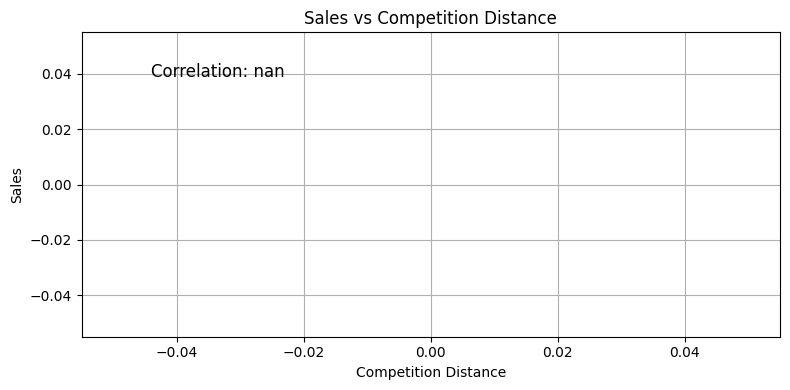

In [130]:
# Create a scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(stores_missing_distance_updated['CompetitionDistance'], stores_missing_distance_updated['Sales'], color='blue', alpha=0.5)

# Add a title and labels
plt.title('Sales vs Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')

# Add correlation information to the plot
plt.text(0.1, 0.9, f'Correlation: {correlation_sales_distance:.2f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Setting Date column as index

In [131]:
df_train = df_train.set_index(['Date'])


Setting Date column as index

In [132]:
df_test = df_test.set_index(['Date'])

In [133]:
print(f"StateHoliday: {df_train['StateHoliday'].nunique()}")
print(f"StoreType: {df_train['StoreType'].nunique()}")
print(f"Assortment: {df_train['Assortment'].nunique()}")
print(f"PromoInterval: {df_train['PromoInterval'].nunique()}")


StateHoliday: 4
StoreType: 4
Assortment: 3
PromoInterval: 4


Logging
Log your steps using the logger library in python. 


In [134]:
import logging

In [135]:
# Configure logging
logging.basicConfig(filename='logfile.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


In [136]:
logging.info('Step 1: Reading the data from CSV file')
logging.info('Step 2: Preprocessing the data')
logging.info('Step 3: Analyzing the data')
logging.info('Step 4: Generating results')

In [137]:
# Read and display the contents of the log file
with open('logfile.log', 'r') as f:
    log_content = f.read()

print(log_content)

2024-02-09 20:20:47,351 - INFO - Step 1: Reading the data from CSV file
2024-02-09 20:21:52,700 - INFO - Step 1: Reading the data from CSV file
2024-02-09 20:21:52,700 - INFO - Step 2: Preprocessing the data
2024-02-09 20:21:52,700 - INFO - Step 3: Analyzing the data
2024-02-09 20:21:52,700 - INFO - Step 4: Generating results
2024-02-13 14:15:11,517 - INFO - Step 1: Reading the data from CSV file
2024-02-13 14:15:11,517 - INFO - Step 2: Preprocessing the data
2024-02-13 14:15:11,517 - INFO - Step 3: Analyzing the data
2024-02-13 14:15:11,526 - INFO - Step 4: Generating results
2024-02-13 20:42:37,588 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-02-13 20:42:38,012 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropria

Saving datasets

In [138]:
df_train.to_csv('df_train.csv')
df_test.to_csv('df_test.csv')